In [1]:
# Standard library imports
import warnings

# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistics and data preprocessing
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Machine learning libraries
from sklearn.cluster import KMeans
from sklearn.metrics import (
    pairwise_distances, 
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    GridSearchCV, 
    train_test_split, 
    KFold, 
    cross_val_score
)
from mpl_toolkits.mplot3d import Axes3D

# Miscellaneous settings
warnings.filterwarnings('ignore')
%matplotlib inline
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

Read the files


In [2]:
file_blanc = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-00g_test_Calibration_curve\data\csv\009_intensity_metrics.csv'
file_005 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-005g_test_CalibrationCurve\data\csv\009-005g_intensity_metrics.csv'
file_01 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-0.1g_test_calibrationCurve\data\csv\0.1g_intensity_metrics.csv'
file_02 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-0.2g_test_calibrationcurve\data\csv\009-0.2g_intensity_metrics.csv'
file_03 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-0.3g_test_calibrationcurve\data\csv\009-0.3g_intensity_metrics.csv'
file_04 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-0.4g_test_calibrationCurve\oo9-0.4g_intensity_metrics.csv'
file_05 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-05g_test_calibration curve\data\csv\009-05g_intensity_metrics.csv'
file_06 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-0.6g_test_calibrationcurve\data\csv\009-0.6g_intensity_metrics.csv'
file_08 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-0.8g_test_calibrationcurve\data\csv\009-0.8g_intensity_metrics.csv'
file_09 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-09g_test_CalibrationCurve\data\csv\009-09g_intensity_metrics.csv'
file_10 = r'C:\Users\kaan\Documents\Thesis Data\009_CalibrationCurve_good\009-1g_test_calibrationCurve\data\csv\009-1g_intensity_metrics.csv'

# Read the CSV files into pandas DataFrames
df_blanc = pd.read_csv(file_blanc)
df_005 = pd.read_csv(file_005)
df_01 = pd.read_csv(file_01)        
df_02 = pd.read_csv(file_02)
df_03 = pd.read_csv(file_03)
df_04 = pd.read_csv(file_04)
df_05 = pd.read_csv(file_05)
df_06 = pd.read_csv(file_06)
df_08 = pd.read_csv(file_08)
df_09 = pd.read_csv(file_09)
df_10 = pd.read_csv(file_10)
# Concatenate the dataframes





Get the average pixel intensity for each concentration for the calibration curve


In [9]:
# Calculate mean intensity for each concentration (using column index 2)
mean_blanc = df_blanc.iloc[:, 2].mean()
mean_005 = df_005.iloc[:, 2].mean()
mean_01 = df_01.iloc[:, 2].mean()
mean_02 = df_02.iloc[:, 2].mean()
mean_03 = df_03.iloc[:, 2].mean()
mean_04 = df_04.iloc[:, 2].mean()
mean_05 = df_05.iloc[:, 2].mean()
mean_06 = df_06.iloc[:, 2].mean()
mean_08 = df_08.iloc[:, 2].mean()
mean_09 = df_09.iloc[:, 2].mean()
mean_10 = df_10.iloc[:, 2].mean()





# Create a dictionary of concentrations and their mean intensities
concentrations = [(0.05/20), (0.1/20), (0.2/20)]
mean_intensities = [ mean_005, mean_01, mean_02]
print(mean_blanc)

215.3663252212389


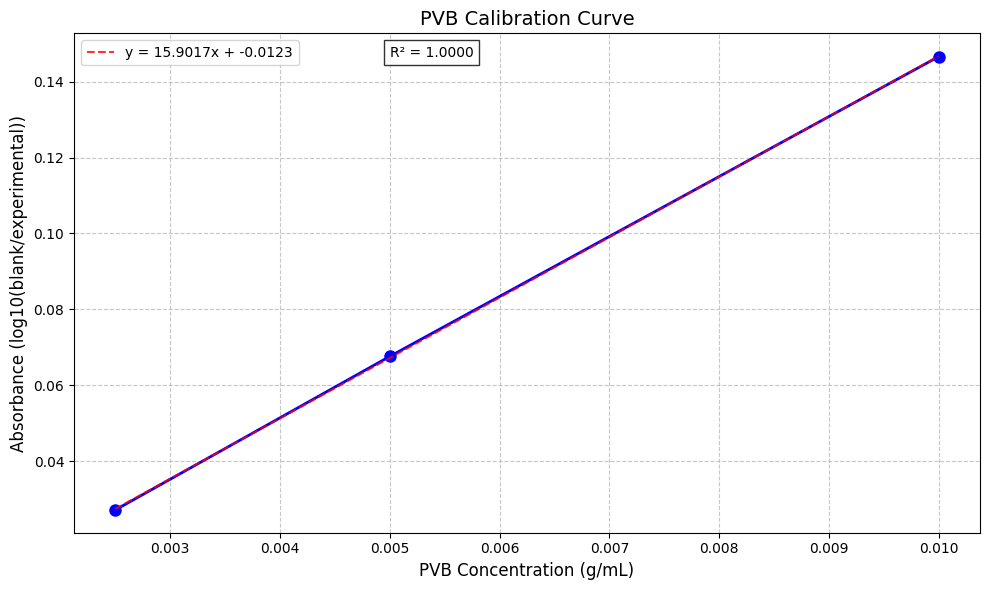

In [10]:
# Calculate absorbance values using the formula: Abs = log10(blank / experimental)
absorbance_values = []
for intensity in mean_intensities:
    absorbance = np.log10(mean_blanc / intensity)
    absorbance_values.append(absorbance)

# Create the calibration curve
plt.figure(figsize=(10, 6))
plt.plot(concentrations, absorbance_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('PVB Concentration (g/mL)', fontsize=12)
plt.ylabel('Absorbance (log10(blank/experimental))', fontsize=12)
plt.title('PVB Calibration Curve', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a trend line
z = np.polyfit(concentrations, absorbance_values, 1)
p = np.poly1d(z)
plt.plot(concentrations, p(concentrations), "r--", alpha=0.8, 
         label=f'y = {z[0]:.4f}x + {z[1]:.4f}')

# Calculate R-squared value
correlation_matrix = np.corrcoef(concentrations, absorbance_values)
r_squared = correlation_matrix[0,1]**2
plt.text(0.005, max(absorbance_values), f'R² = {r_squared:.4f}', 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Print the linear function equation
print(f"Linear function: y = {z[0]:.4f}x + {z[1]:.4f}")

Linear function: y = 15.9017x + -0.0123
